# Loading Data

In [35]:
import pandas as pd

In [36]:
df= pd.read_csv("C:/Users/Sai Srinivas/Desktop/python/heart disease prediction/heart_dataset.csv")

# Data Exploration

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
df.drop_duplicates(inplace=True)

## Feature Selection


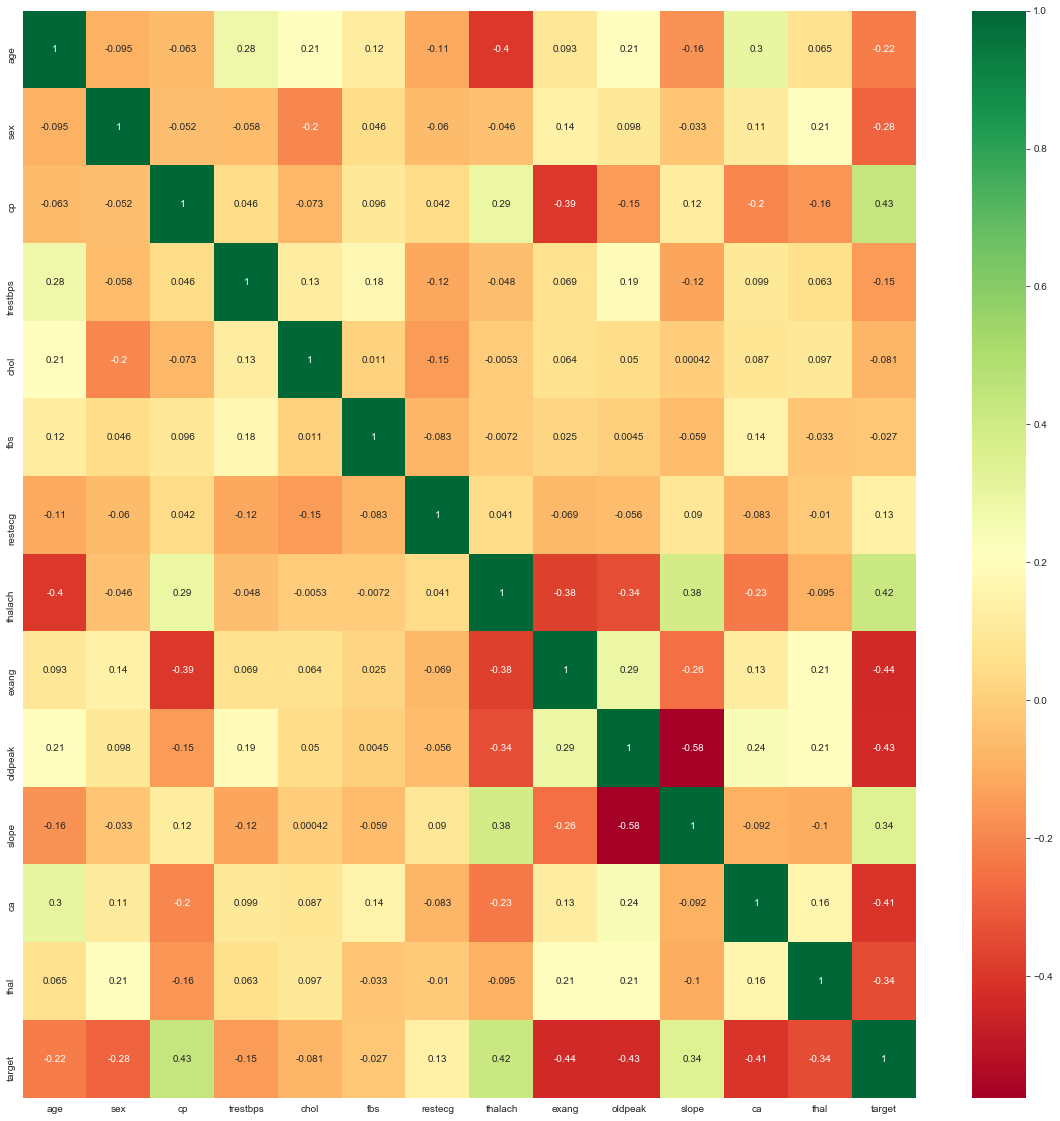

In [41]:
import seaborn as sns
correlations = df.corr()
top_corr_features = correlations.index
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000125587701C8>,
      dtype=object)

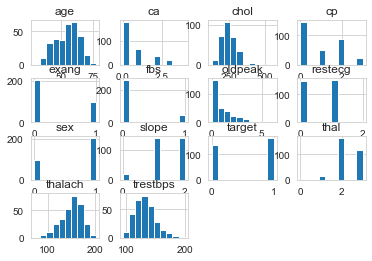

In [42]:
df.hist()

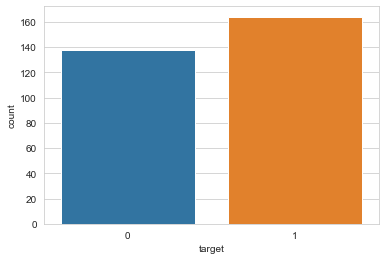

In [43]:
sns.set_style("whitegrid")
sns.countplot(x="target",data=df)

##  Data Processing : Converting Categorical Columns to dummy variables and scaling the continues variables

In [44]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [45]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
columns=['age','trestbps','chol','thalach','oldpeak']
dataset[columns]=sc.fit_transform(df[columns])

In [47]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.042904,-1.232023,0.338703,-0.768384,0.135360,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503322,0.707035,-1.035462,-0.374779,2.032684,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.285561,-0.091401,-2.235438,-1.511859,0.135360,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [48]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

# Splitting data

In [49]:
from sklearn.model_selection import GridSearchCV,train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [50]:
from sklearn.metrics import roc_auc_score,accuracy_score

# K- Nearest Neighbors Model

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train,y_train)
    predict=knn_classifier.predict(X_test)
    score=round(roc_auc_score(y_test,predict),4)
    knn_scores.append(score)


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

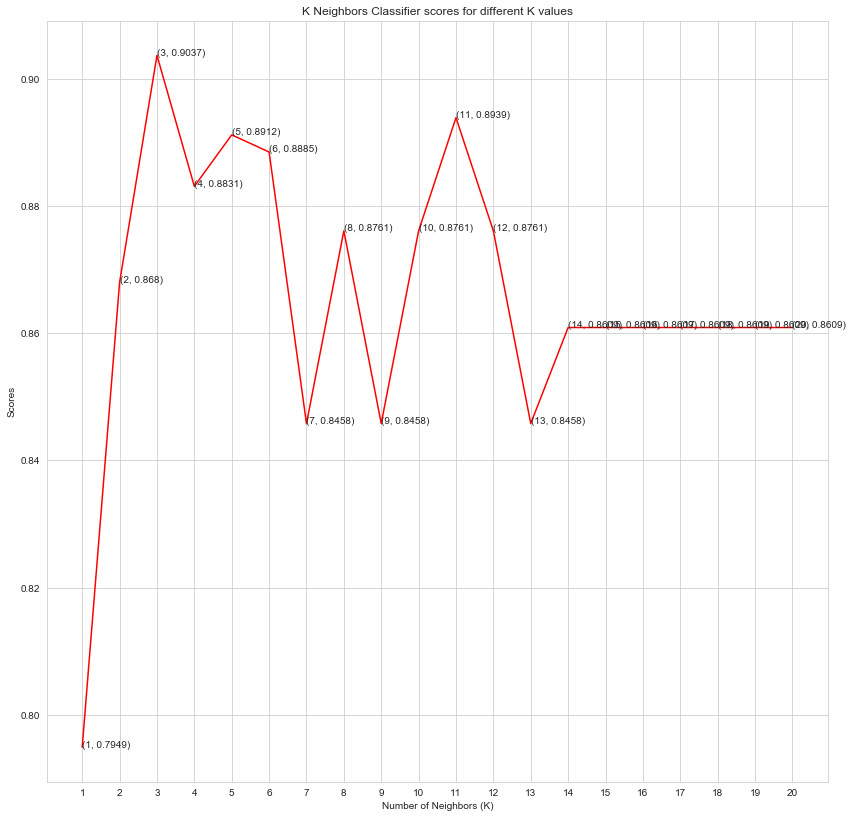

In [52]:
plt.figure(figsize=(14,14))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [53]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
knn_predict=knn_classifier.predict(X_test)

In [55]:
accuracy_score(y_test,knn_predict)

0.9016393442622951

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Hyper Parameter Tuning

In [57]:
parameters={'n_estimators':[100,200,300,500],
            'criterion': ['gini','entropy'],
            'max_depth':[1,2,4,'None'],
            'max_leaf_nodes':[2,'None'],
            'max_features':['auto','sqrt'] }

In [58]:
rf_estimator=RandomForestClassifier()

In [59]:
gridsearch=GridSearchCV(estimator=rf_estimator,param_grid=parameters,cv=5,scoring=roc_auc_score)

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 'None'],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [2, 'None'],
                         'n_estimators': [100, 200, 300, 500]},
             scoring=<function roc_auc_score at 0x00000125562058B8>)

In [62]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'max_leaf_nodes': 2,
 'n_estimators': 100}

# Random Forest Model

In [63]:
final_model_rf=RandomForestClassifier(criterion='gini',max_depth= 1,max_features= 'auto',max_leaf_nodes= 2,n_estimators= 100)

In [64]:
final_model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, max_leaf_nodes=2)

In [65]:
predict=final_model_rf.predict(X_test)

In [66]:
accuracy_score(y_test,predict)

0.8360655737704918